In [30]:
## To import pandas
import pandas as pd
## To import matplotlib.pyplot
import matplotlib.pyplot as plt

In [31]:
##Reading dataset Salary_Data.csv
data = pd.read_csv("Salary_Data.csv")   ### kaggle 

##Reading dataset Salary_Data1.txt
##data = pd.read_csv("Salary_Data1.txt", delimiter = "\t")   ### kaggle 
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [20]:
data


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,56642
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [32]:
## to see summary of dataset
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,75871.433333
std,2.837888,27502.222799
min,1.100000,37731.000000
25%,3.200000,56642.000000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [33]:
## to check isnull 
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [34]:
## to check isnull 
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [25]:
len(data)

30

In [35]:
x = data.iloc[:]['YearsExperience'].values
y = data.iloc[:]['Salary'].values

In [27]:
y


array([ 39343,  46205,  37731,  43525,  39891,  56642,  56642,  54445,
        64445,  57189,  63218,  55794,  56957,  56642,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [37]:
#handling missing data(Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
#Fitting imputer object to the dependent variables y.  
imputer= SimpleImputer(missing_values =0, strategy='mean')  
#Replacing missing data with the calculated mean value  
imputer  = imputer.fit(y[:, 1])
y[:, 1] = imputer.transform(y[:, 1])

IndexError: too many indices for array

In [38]:
x.shape

(30,)

In [39]:
y.shape

(30,)

In [40]:
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)

In [41]:
x.shape

(30, 1)

In [42]:
#### Divide the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [43]:
len(xtrain)

24

In [44]:
##### Build the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [45]:
#### Train the model
lr.fit(xtrain,ytrain) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
ypred = lr.predict(xtest)

In [47]:
ypred

array([[115857.68796972],
       [ 89990.91949549],
       [ 52627.80947715],
       [ 81368.66333741],
       [116815.71643173],
       [ 62208.09409723]])

In [48]:
ytest

array([[116969],
       [ 91738],
       [ 56642],
       [ 81363],
       [112635],
       [ 63218]], dtype=int64)

In [49]:
#(coefficient of determination) regression score function
from sklearn.metrics import r2_score
r2 = r2_score(ytest,ypred)
r2

0.9874382725889592

In [51]:
m = lr.coef_
c = lr.intercept_
print(m,c)

[[9580.28462009]] [24844.9840789]


In [ ]:
### y = mx +c
20.1 * m + c

In [ ]:
lr.predict([[20.1]])

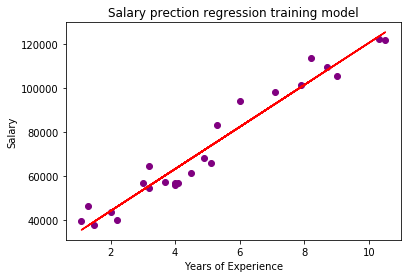

In [53]:
#### Plot line of regression (Training Samples)
plt.scatter(xtrain,ytrain,color="purple")
plt.plot(xtrain,lr.predict(xtrain),color='red')
plt.title("Salary prection regression training model")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

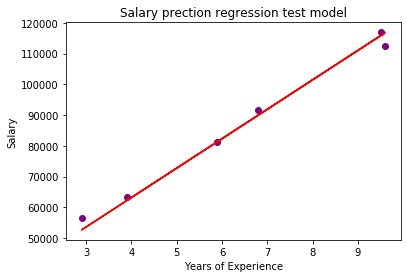

In [54]:
#### Plot line of regression (Testing Samples)
plt.scatter(xtest,ytest,color="purple")
plt.plot(xtest,lr.predict(xtest),color='red')
plt.title("Salary prection regression test model")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

plt.show()

In [55]:
from sklearn.externals import joblib
joblib.dump(lr,"mymodel.pkl")

C:\Users\APIIT\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['mymodel.pkl']

In [56]:
## loading
mymodel = joblib.load('mymodel.pkl')

In [57]:
mymodel.predict([[19]])

array([[206870.39186055]])

In [58]:
# Lasso regression

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
print(clf.coef_)
print(clf.intercept_)


[0.85 0.  ]
0.15000000000000002


linear regression train score: 0.950944708755149
linear regression test score: 0.9874382725889593
ridge regression train score low alpha: 0.9509447059887157
ridge regression test score low alpha: 0.9874451947207237
ridge regression train score high alpha: 0.9484539263880564
ridge regression test score high alpha: 0.9900891426323472


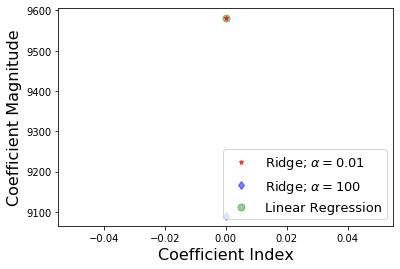

In [61]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(xtrain, ytrain)
rr100 = Ridge(alpha=10) #  comparison with alpha value
rr100.fit(xtrain, ytrain)
train_score=lr.score(xtrain, ytrain)
test_score=lr.score(xtest, ytest)
Ridge_train_score = rr.score(xtrain,ytrain)
Ridge_test_score = rr.score(xtest, ytest)
Ridge_train_score100 = rr100.score(xtrain,ytrain)
Ridge_test_score100 = rr100.score(xtest, ytest)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()